<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_lec_x_gradient_boosting_car_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Ensembling technique
* Bagging(Bootstrap aggregation)
  * Splitting dataset of size n with replacement into m subsets of size k where k <= n, where m is the number of homogenous base-learners
  * How to  aggregate the results? Voting, or averaging, ... think.
  * Merits:
    * Reduces variance, how? 
  * Locate a dataset which highlights difference between RF and Decision tree and decision tree-GBDT(TODO)  
  * Logic behind finding bias (TODO)
* Boosting: https://scikit-learn.org/stable/modules/ensemble.html#adaboost
  * Sequential model building based on data-reweighing (difficult data has higher weight than sinpler data)
  * Merits:
    * Reduces bias
* Stacking:
  * bagging with heterogenous base-learns + meta-classifier
  * Merits:
    * ??
* Cascading: 
  * Heterogenous boosting

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# use for both decision and random forest



In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('/content/car_evaluation.csv')
df.head()
#df

,buy_price,maintenance_cost,no_of_doors,no_of_persons,boot_space,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Putting feature variable to X
X = df.drop('decision',axis=1)
# Putting response variable to y
y = df['decision']
y_unique_values = y.unique()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
#feature_list = ['Outlook', 'Temperature', 'Humidity', 'Windy']
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

Index(['buy_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons',
       'boot_space', 'safety'],
      dtype='object')
['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


In [ ]:
print(X)

      buy_price  maintenance_cost  no_of_doors  no_of_persons  boot_space  \
0             3                 3            0              0           2   
1             3                 3            0              0           2   
2             3                 3            0              0           2   
3             3                 3            0              0           1   
4             3                 3            0              0           1   
...         ...               ...          ...            ...         ...   
1723          1                 1            3              2           1   
1724          1                 1            3              2           1   
1725          1                 1            3              2           0   
1726          1                 1            3              2           0   
1727          1                 1            3              2           0   

      safety  
0          1  
1          2  
2          0  
3          1  


In [ ]:
le.fit(y)
y = le.transform(y)
print(y)

[2 2 2 ... 2 1 3]


In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
#clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

1.0 0.9672447013487476


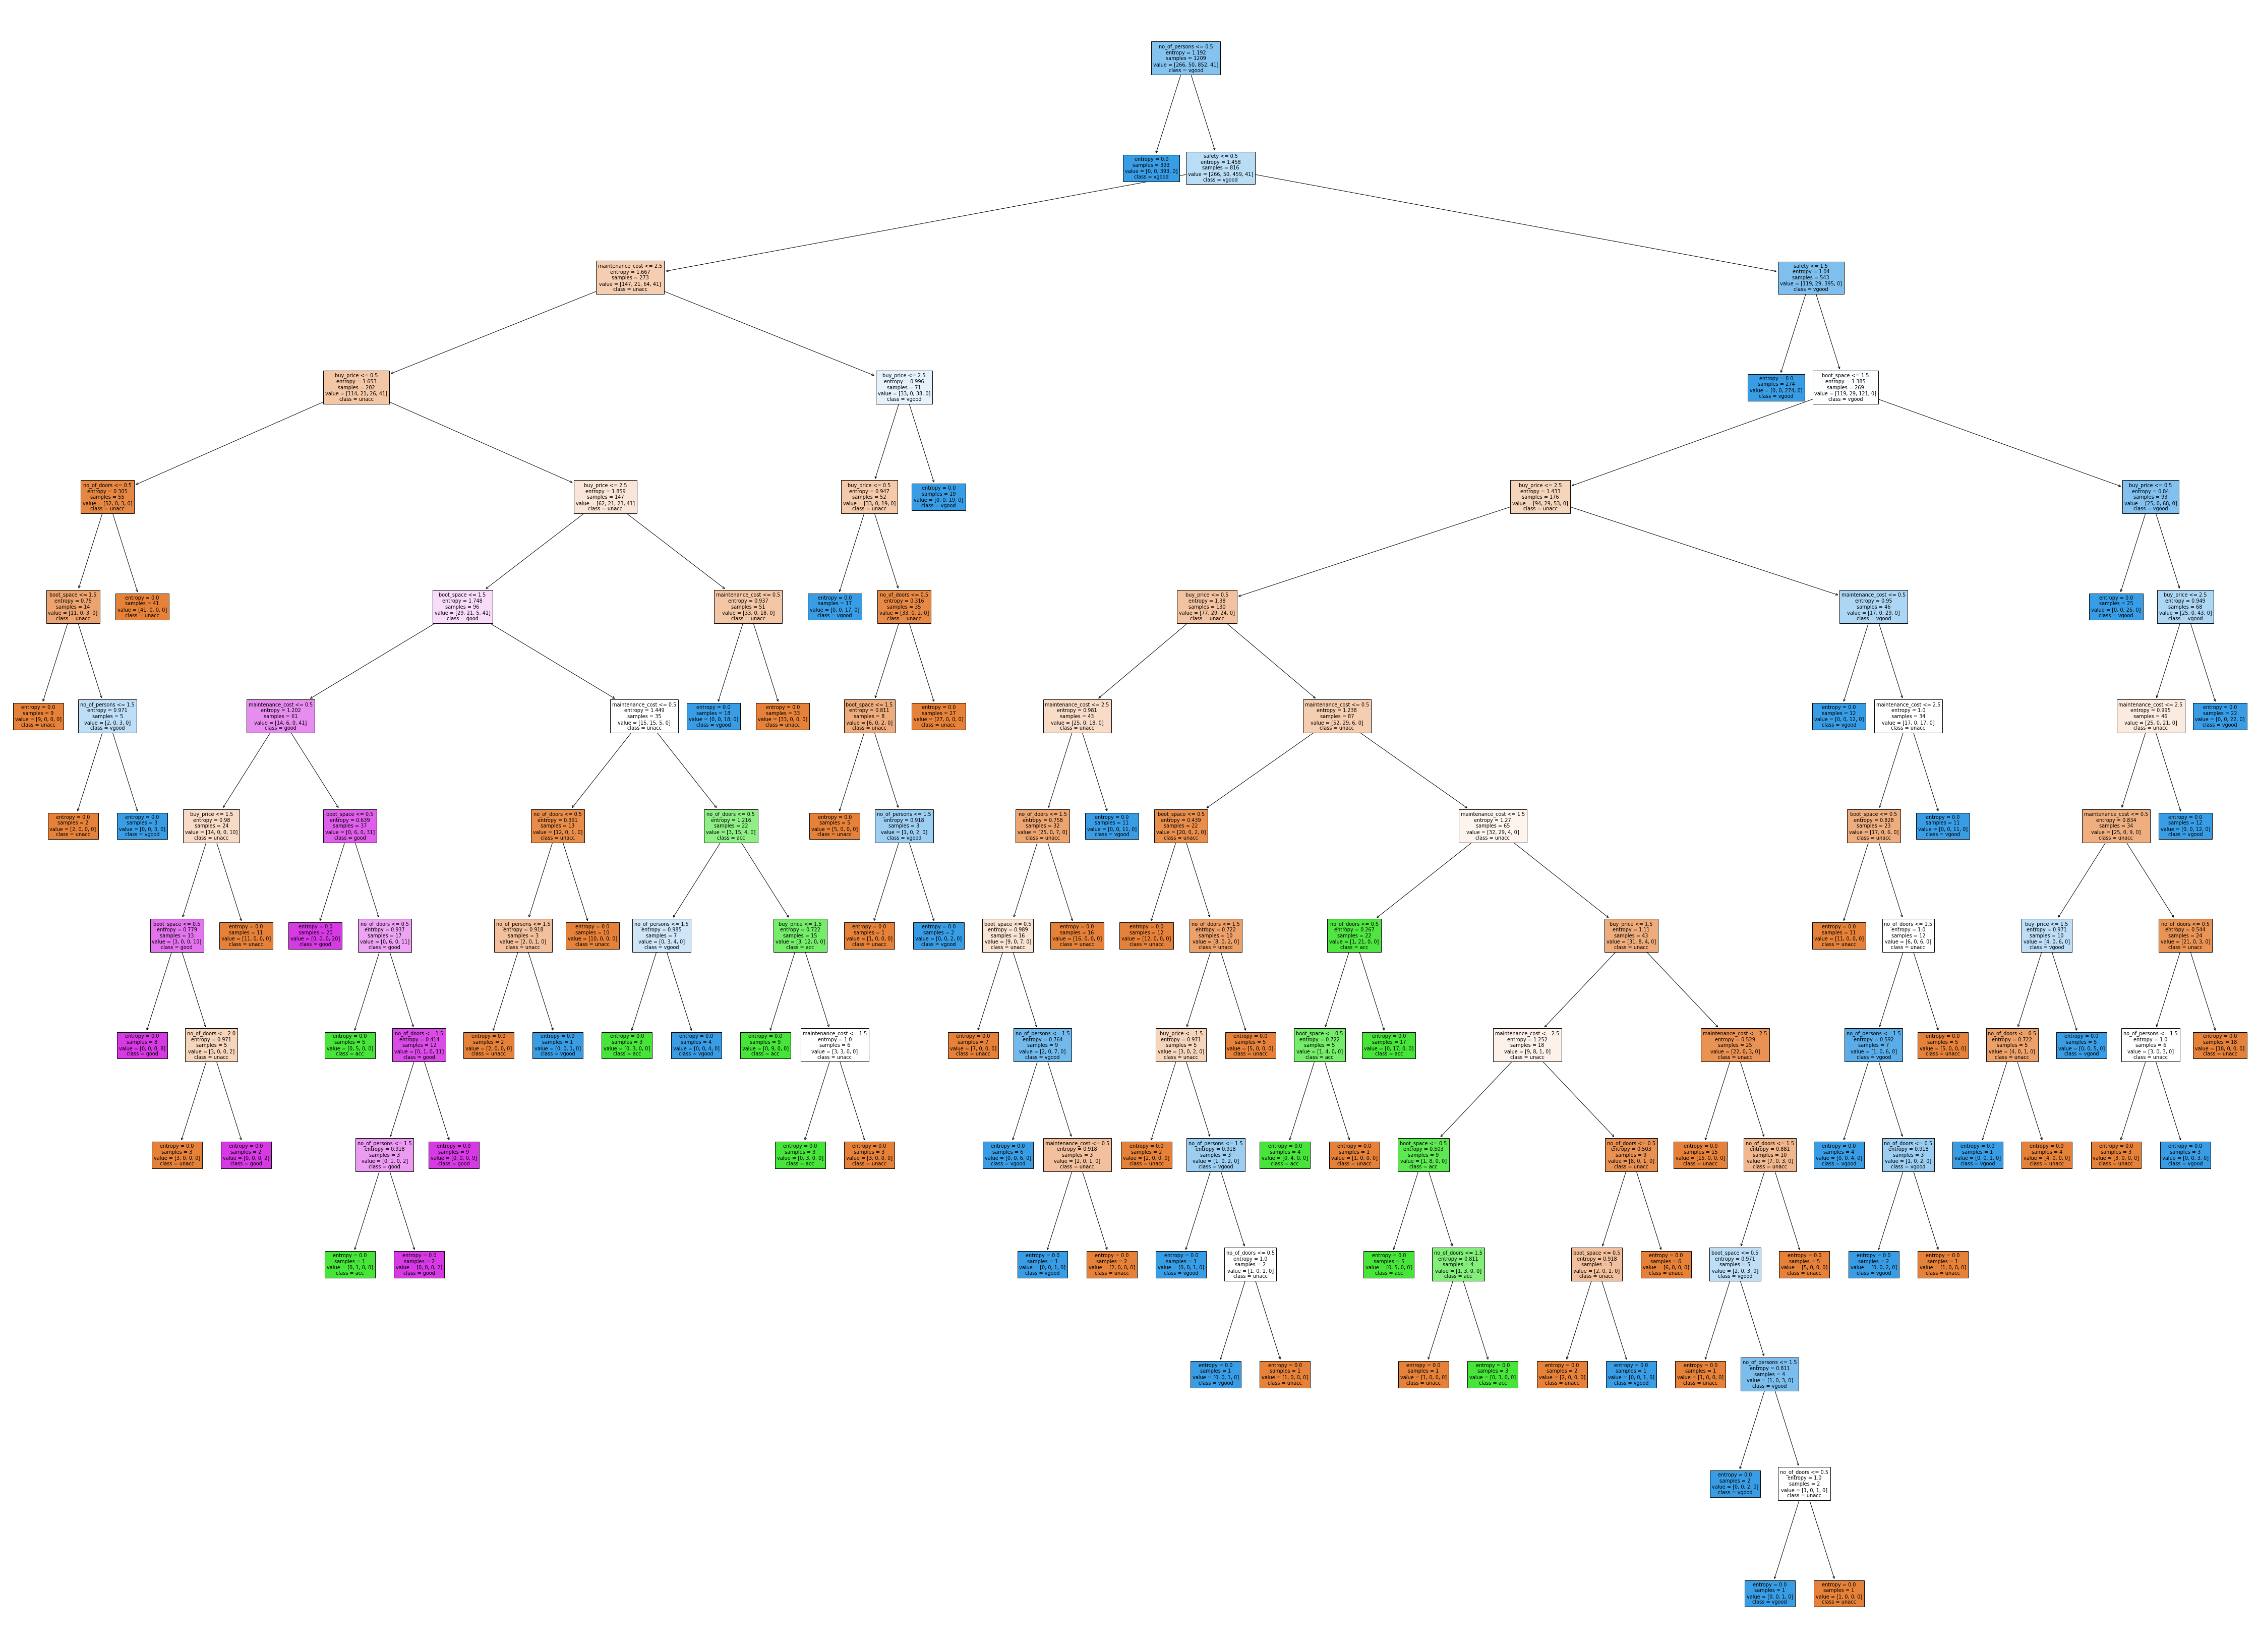

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80, 60))
#plot_tree(clf, feature_names = X.columns,class_names=['unacc', "acc", 'good', 'vgood'],filled=True);
plot_tree(clf, feature_names = X.columns,class_names=y_unique_values,filled=True);

In [ ]:
# Decreasing overfitting by increasing min split threshold
# can also explain bias vs variance
# can plot knee-elbow for min-sample split
clf = DecisionTreeClassifier(random_state=0, criterion="entropy",min_samples_split=2, max_depth = 20)
#clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

In [ ]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

1.0 0.9672447013487476


## Gradient boosting (https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)
* Generalization of boosting to arbitrary differentiable loss function.
* Concepts:
  $\hat{y_i} = F_M(x_i) = \sum_{m=1}^{M} h_m(x_i)$, hm are the estimators called _weak learners_, $M$ corresponds to the number of estimators/weak learners.
  * GBRTs are built in greedy fashion: $F_m(x) = F_{m-1}(x) + h_m(x),$
  $h_m =  \arg\min_{h} L_m = \arg\min_{h} \sum_{i=1}^{n}
l(y_i, F_{m-1}(x_i) + h(x_i))$
  * **continue from https://scikit-learn.org/stable/modules/ensemble.html#id16**


### Gradient boosting at scale:
 * 
 * LightGBM: https://papers.nips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Reviews.html

In [ ]:
#https://medium.com/swlh/gradient-boosting-trees-for-classification-a-beginners-guide-596b594a14ea
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=20, random_state=0, min_samples_split=32)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=20,
                           min_samples_split=32, n_estimators=20,
                           random_state=0)

In [ ]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.7667493796526055 0.7418111753371869


### Support vector machines:
#### What is the purpose?
  * Classicication, regression and clustering(anamoly detection)
  
#### Concepts: (https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)
* Kernel: 
  * Functions that map the input features to the higher-dimensional space over which the input becomes _linearly separable_: https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:Kernel_Machine.svg
* Support vectors:
  * Support vectors define the hyperplance/decision function that sepearate classes in SVM.
  * Samples on the margin are called support vectors: https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Kernel trick: https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:Kernel_trick_idea.svg


#### How to compute support vectors?

* Training maximises the gap between separation hyperplane and points belonging to classes. 
* The training model maps a point as beloning to either one class or the other without any associated probability.
* *Kernel trick* for non-linear classification: implicitely mapping inputs to higher dimensional space

* Training objective(https://scikit-learn.org/stable/modules/svm.html#svc):
  \begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}

* Inference:  
  * $\sum_{i\in SV} y_i \alpha_i K(x_i, x) + b$, where, $K$ is the kernel function, $x_i$ is the $i^{th}$ support vector, $y_i$ is the corresponding label vector and $b$ is bias.
    * **Similar to single-layer NN ??**

#### Support vector regression(SVR): **TODO**
#### One class SVM(for outlier detection):
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM  

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = 'rbf'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.9280397022332506 0.9132947976878613


### Bias vs Variance
High  Low combinations of bias and variance

Underfitting an overfitting phenomena

Decision tree-overffiting : Post and Pre prunning of decision trees

How Random forrest fixes overfitting

Bagging for overfitting

Boosting for under-fitting

